In [9]:
#import library
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans


In [10]:
df = pd.read_csv('../../Data/f_churn.csv')

In [3]:
df.head()

,Unnamed: 0,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain,Gender
0,0,619,42,2,0.00,1,1,1,101348.88,1,1,0,0,1
1,1,608,41,1,83807.86,1,0,1,112542.58,0,0,0,1,1
2,2,502,42,8,159660.80,3,1,0,113931.57,1,1,0,0,1
3,3,699,39,1,0.00,2,0,0,93826.63,0,1,0,0,1
4,4,850,43,2,125510.82,1,1,1,79084.10,0,0,0,1,1


In [4]:
X=df.drop(['Unnamed: 0','Exited'],axis=1)
y=df['Exited']

In [5]:
#vis to 2D
pca=PCA(n_components=2)

In [6]:
X2=pca.fit_transform(X)

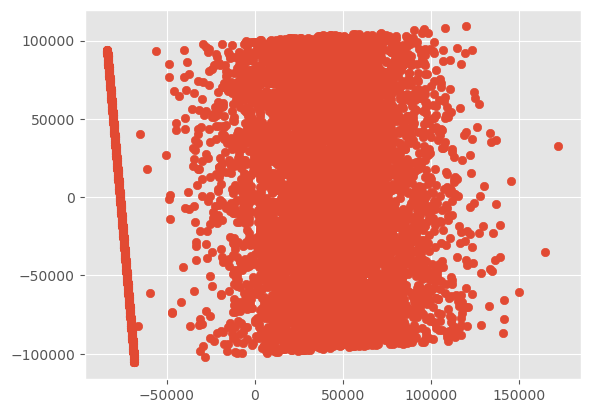

In [16]:
plt.style.use('ggplot')
plt.scatter(X2[:,0],X2[:,1])

In [11]:
wcss=[]
for i in range(1,15):
    kmeans=KMeans(n_clusters=i,init = 'k-means++', n_init = 10 ,random_state=26)
    
    kmeans.fit(X2)
    wcss.append(kmeans.inertia_)
    

Text(0, 0.5, 'Inertia')

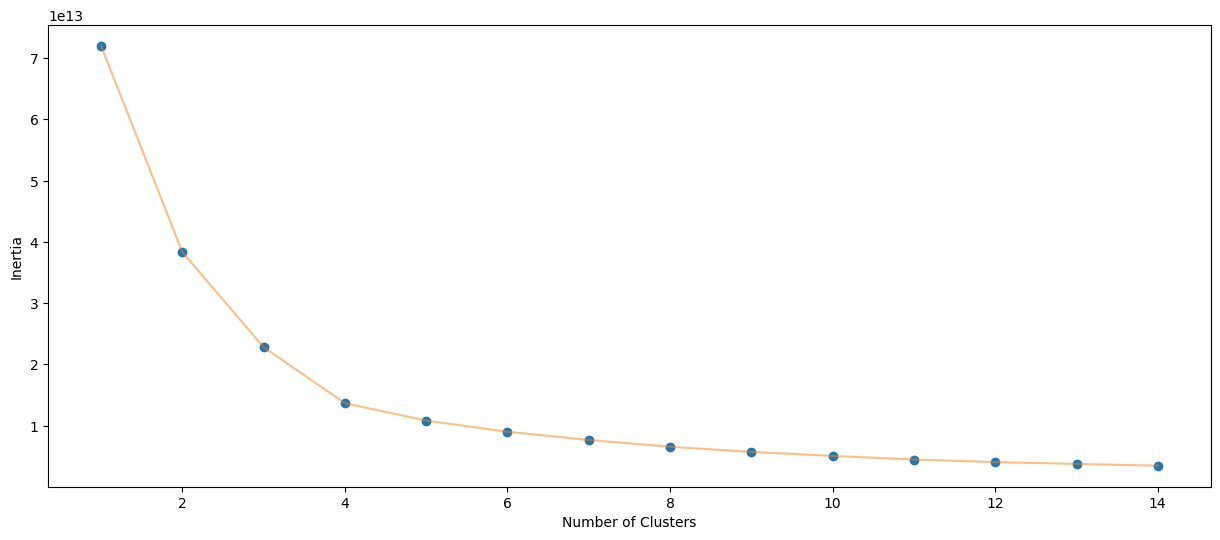

In [12]:
plt.figure(1 , figsize = (15 ,6))
plt.plot(np.arange(1 , 15) , wcss , 'o')
plt.plot(np.arange(1 , 15) , wcss , '-' , alpha = 0.5)
plt.xlabel('Number of Clusters') 
plt.ylabel('Inertia')

In [13]:
kmeans = KMeans(n_clusters = 4 ,init='k-means++',random_state= 111  )
kmeans.fit(X2)
labels1 = kmeans.labels_
centroids1 = kmeans.cluster_centers_

In [15]:
plt.scatter( x = 'Income' ,y = 'Score' , data = data , c = labels1 , s = 200 )

plt.style.use('ggplot')
plt.scatter(X2[:,0],X2[:,1] , c=labels1)

MemoryError: Unable to allocate 1001. TiB for an array with shape (10726812, 12821502) and data type float64